# Side Quest: Experimenting with kernels

### Arnau Escapa Farrés

In this side quest we will experiment on the performance of different kernel functions on two classifications problems in a visual way. Let us first contextualize the problem.

Let us consider  the least square function $\mathcal{L}(f(x_i),y_i)=(f(x_i)-y_i)^2$, as the measure used to evaluate the fitting goodness of a classifier function $f$. 

Then the choise of $f$ is given by

$$f^*=\underset{f\in \mathcal{H}}{\operatorname{arg\,min}}\frac{1}{n}\frac{1}{2}\sum_i(f(x_i)-y_i)^2 +\frac{1}{2}\lambda\|f\|_{\mathcal{H}}^2 $$

The solution of the problem is given by the Representer's theorem:
$f^*(x)=\sum_j{\alpha_j K(x_j,x)}$


Taking this into account one has that

$$
f^* = (K+\lambda I)^{-1}y
$$
Thus, the solution is just a matrix inversion $\mathcal{O}(n^3)$ and a matrix multiplication $\mathcal{O}(n^2)$ that depends on the number of samples $n$ .
The matrix $K + \lambda I$ is symmetric positive definite, so the appropriate algorithm is Cholesky factorization ( or SVD ).

RKHS needs the definition of a positive semidefinite kernel function $K$:

$$
\begin{align*}
{\bf linear}: &K(x_i,x_j)=x_i^Tx_j\\
{\bf polynomial:}&K(x_i,x_j)=(x_i^Tx_j+1)^d\\
{\bf gaussian:}&K(x_i,x_j)=exp\big( -\frac{\|x_i-x_j\|^2}{\sigma^2} \big)
\end{align*}$$

In class we have checked the performance of the Gaussian kernel, here we will do the same for the linear and polynomial. 

Let us start working on the moons dataset

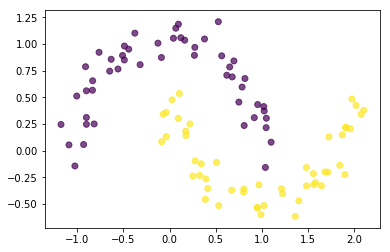

In [261]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_moons

X,y=make_moons(noise = 0.1)

y = 2*y[:,np.newaxis]-1
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y,  alpha=0.7)

### Linear kernel

In [262]:
def linear_kernel(xa,xb):
    return np.dot(xa,xb.T)

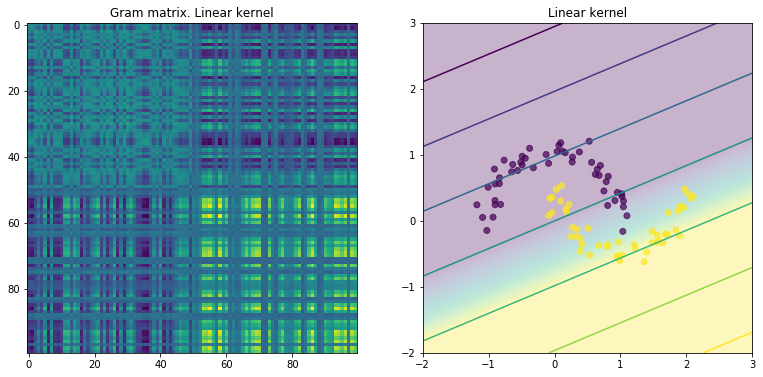

In [263]:
fig,ax=plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(13,13)

idx = np.argsort(y.ravel(),axis=0)
y_sort = y[idx]
X_sort = X[idx,:]
K = linear_kernel(X_sort,X_sort)
ax[0].imshow(K,interpolation="nearest")
ax[0].title.set_text('Gram matrix. Linear kernel')
K = linear_kernel(X,X)
lamb = 1.
alpha = np.dot(np.linalg.inv(K+lamb*np.eye(K.shape[0])),y)

xx,yy = np.meshgrid(np.linspace(-2,3,200),np.linspace(-2,3,200))
viz=np.c_[xx.ravel(),yy.ravel()]

z = np.dot(linear_kernel(viz,X),alpha)

ax[1].scatter(X[:, 0], X[:, 1], c=y,  alpha=0.7)
ax[1].set_xlim([-2.,3.])
ax[1].set_ylim([-2.,3.])
ax[1].imshow(z.reshape((200,200)), interpolation='bilinear', origin='lower', extent=(-2,3,-2,3),alpha=0.3, vmin=0, vmax=1)
ax[1].contour(xx,yy,z.reshape((200,200)))
ax[1].title.set_text('Linear kernel')



Observe that the performace seems quite poor. We are not surpriced with this fact since  the data is not linearly distribuited. We may expect a better performance with a polynomial kernel.

###  Polyinomial Kernel

In [264]:
def polynomial_kernel(xa,xb,d):
    return (np.dot(xa,xb.T)+1)**d

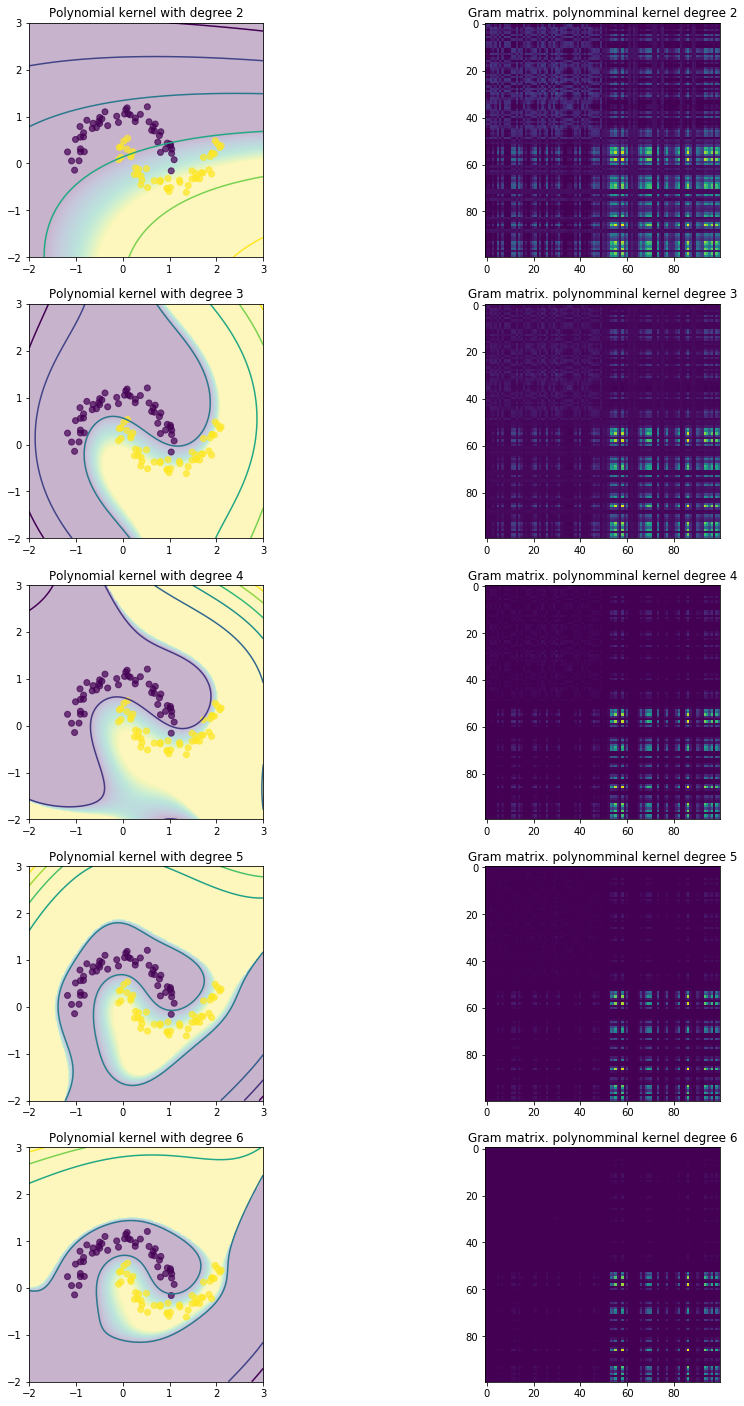

In [265]:
d_max=7
d_min=2


N_rows=d_max-d_min; N_cols=2
fig,ax=plt.subplots(nrows=N_rows,ncols=N_cols)
fig.set_size_inches(15,25)

j=0
for d in range(d_min,d_max):
    idx = np.argsort(y.ravel(),axis=0)
    y_sort = y[idx]
    X_sort = X[idx,:]
    K = polynomial_kernel(X_sort,X_sort,d)
    ax[j,1].imshow(K,interpolation="nearest")
    ax[j,1].title.set_text('Gram matrix. polynomminal kernel degree '+str(d))
    K = polynomial_kernel(X,X,d)
    lamb = 1.
    alpha = np.dot(np.linalg.inv(K+lamb*np.eye(K.shape[0])),y)

    xx,yy = np.meshgrid(np.linspace(-2,3,200),np.linspace(-2,3,200))
    viz=np.c_[xx.ravel(),yy.ravel()]

    z = np.dot(polynomial_kernel(viz,X,d),alpha)

    ax[j,0].scatter(X[:, 0], X[:, 1], c=y,  alpha=0.7)
    ax[j,0].set_xlim([-2.,3.])
    ax[j,0].set_ylim([-2.,3.])
    ax[j,0].imshow(z.reshape((200,200)), interpolation='bilinear', origin='lower', extent=(-2,3,-2,3),alpha=0.3, vmin=0, vmax=1)
    ax[j,0].contour(xx,yy,z.reshape((200,200)))
    ax[j,0].title.set_text('Polynomial kernel with degree '+str(d))
    j+=1

For a degree greater than 2 the data is nicely classified as expected. Observe that a too high degree could lead to overfloating.

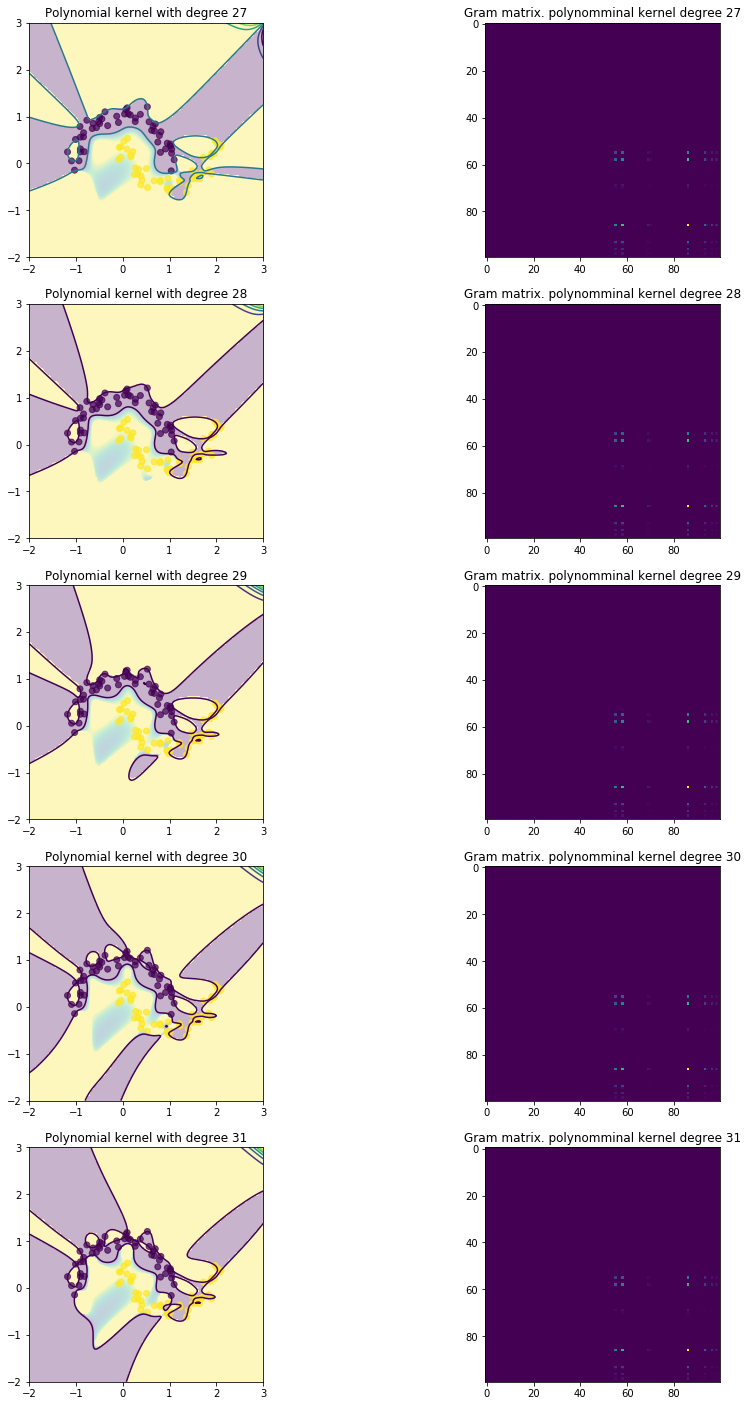

In [267]:
d_max=32
d_min=27


N_rows=d_max-d_min; N_cols=2
fig,ax=plt.subplots(nrows=N_rows,ncols=N_cols)
fig.set_size_inches(15,25)

j=0
for d in range(d_min,d_max):
    idx = np.argsort(y.ravel(),axis=0)
    y_sort = y[idx]
    X_sort = X[idx,:]
    K = polynomial_kernel(X_sort,X_sort,d)
    ax[j,1].imshow(K,interpolation="nearest")
    ax[j,1].title.set_text('Gram matrix. polynomminal kernel degree '+str(d))
    K = polynomial_kernel(X,X,d)
    lamb = 1.
    alpha = np.dot(np.linalg.inv(K+lamb*np.eye(K.shape[0])),y)

    xx,yy = np.meshgrid(np.linspace(-2,3,200),np.linspace(-2,3,200))
    viz=np.c_[xx.ravel(),yy.ravel()]

    z = np.dot(polynomial_kernel(viz,X,d),alpha)

    ax[j,0].scatter(X[:, 0], X[:, 1], c=y,  alpha=0.7)
    ax[j,0].set_xlim([-2.,3.])
    ax[j,0].set_ylim([-2.,3.])
    ax[j,0].imshow(z.reshape((200,200)), interpolation='bilinear', origin='lower', extent=(-2,3,-2,3),alpha=0.3, vmin=0, vmax=1)
    ax[j,0].contour(xx,yy,z.reshape((200,200)))
    ax[j,0].title.set_text('Polynomial kernel with degree '+str(d))
    j+=1

### Checkboard

Let us repeat the exiperement with a different dataset. We will use checkboard distributed data. We write a small routine that generates this data.

In [268]:
def checkboard_data_generator(rows,cols,num_board_samples):
    "A poor checkboard data generator with same board lenghts equidistribuited"
    num_samples=num_board_samples*cols*rows
    X=np.random.uniform(0,1,size=(num_samples,2))
    X[:,0]= X[:,0]/rows
    X[:,1]= X[:,1]/cols
    y=np.empty(num_samples)
    one=1
    for i in range (rows):
        for j in range(cols):
            X[(i*cols+j)*num_board_samples:(i*cols+j+1)*num_board_samples,0]+= i/rows
            X[(i*cols+j)*num_board_samples:(i*cols+j+1)*num_board_samples,1]+= j/cols
            y[(i*cols+j)*num_board_samples:(i*cols+j+1)*num_board_samples]=one
            if not((cols%2==0) and (j==cols-1)):
                one=-one
    return (X,y)
        

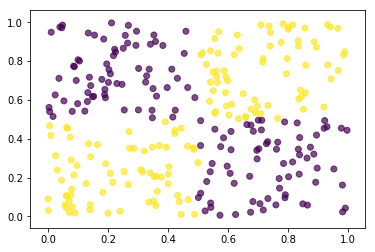

In [269]:
X,y=checkboard_data_generator(2,2,70)

plt.scatter(X[:, 0], X[:, 1],c=y,  alpha=0.7)

We may expect that linear kernel will fail on the attempt to classify this dataset in the same way that in moons example. Let us check it.

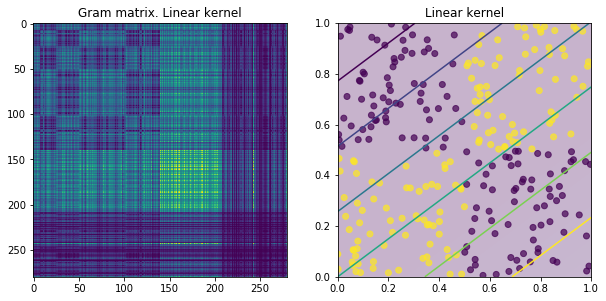

In [271]:
fig,ax=plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(10,10)

idx = np.argsort(y.ravel(),axis=0)
y_sort = y[idx]
X_sort = X[idx,:]
K = linear_kernel(X_sort,X_sort)
ax[0].imshow(K,interpolation="nearest")
ax[0].title.set_text('Gram matrix. Linear kernel')
K = linear_kernel(X,X)
lamb = 1.
alpha = np.dot(np.linalg.inv(K+lamb*np.eye(K.shape[0])),y)

xx,yy = np.meshgrid(np.linspace(0,1,200),np.linspace(0,1,200))
viz=np.c_[xx.ravel(),yy.ravel()]

z = np.dot(linear_kernel(viz,X),alpha)

ax[1].scatter(X[:, 0], X[:, 1], c=y,  alpha=0.7)
ax[1].set_xlim([0.,1.])
ax[1].set_ylim([0.,1.])
ax[1].imshow(z.reshape((200,200)), interpolation='bilinear', origin='lower', extent=(0,1,0,1),alpha=0.3, vmin=0, vmax=1)
ax[1].contour(xx,yy,z.reshape((200,200)))
ax[1].title.set_text('Linear kernel')


It indead failed. Let us try now with  polynomial kernel.

In [272]:
def show_checkboard_polynomial_kernel_class(d_min,d_max):
    N_rows=d_max-d_min; N_cols=2
    fig,ax=plt.subplots(nrows=N_rows,ncols=N_cols)
    fig.set_size_inches(13,20)

    j=0
    for d in range(d_min,d_max):
        idx = np.argsort(y.ravel(),axis=0)
        y_sort = y[idx]
        X_sort = X[idx,:]
        K = polynomial_kernel(X_sort,X_sort,d)
        ax[j,1].imshow(K,interpolation="nearest")
        ax[j,1].title.set_text('Gram matrix. polynomminal kernel degree '+str(d))
        K = polynomial_kernel(X,X,d)
        lamb = 1.
        alpha = np.dot(np.linalg.inv(K+lamb*np.eye(K.shape[0])),y)

        xx,yy = np.meshgrid(np.linspace(-2,3,200),np.linspace(-2,3,200))
        viz=np.c_[xx.ravel(),yy.ravel()]

        z = np.dot(polynomial_kernel(viz,X,d),alpha)

        ax[j,0].scatter(X[:, 0], X[:, 1], c=y,  alpha=0.7)
        ax[j,0].set_xlim([0.,1.])
        ax[j,0].set_ylim([0.,1.])
        ax[j,0].imshow(z.reshape((200,200)), interpolation='bilinear', origin='lower', extent=(-2,3,-2,3),alpha=0.32, vmin=0, vmax=1)
        ax[j,0].contour(xx,yy,z.reshape((200,200)))
        ax[j,0].title.set_text('Polynomial kernel with degree '+str(d))
        j+=1

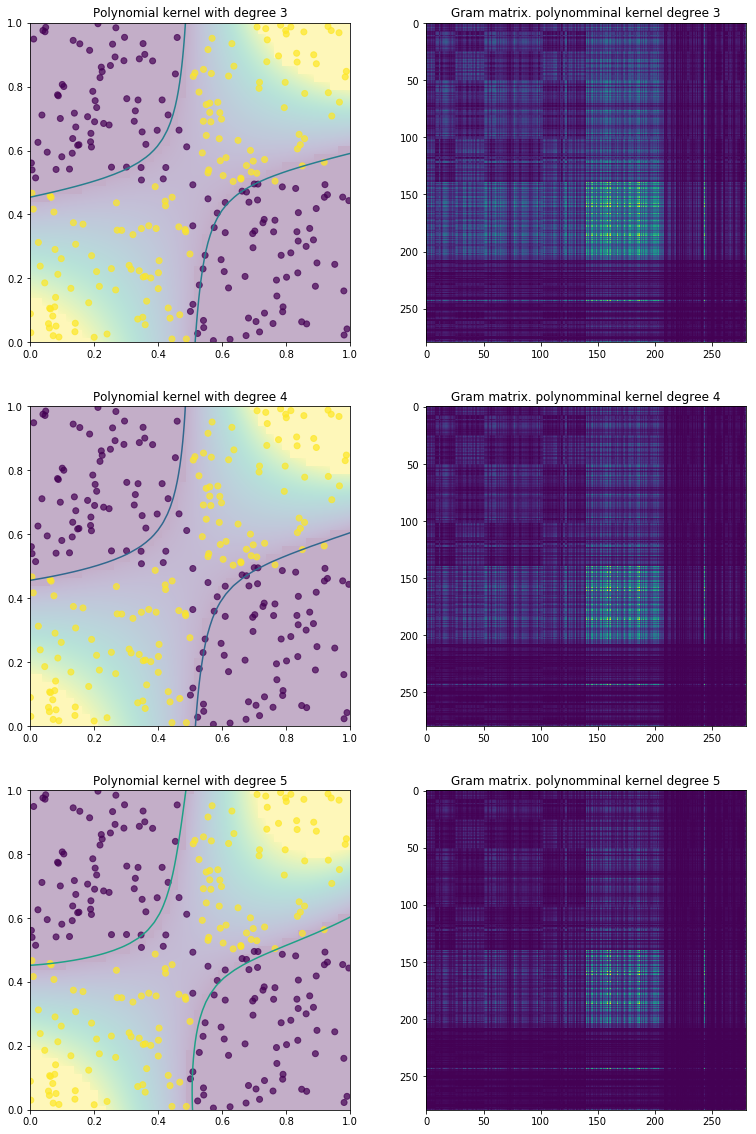

In [274]:
show_checkboard_polynomial_kernel_class(3,6)

Let us try to use higher degree.

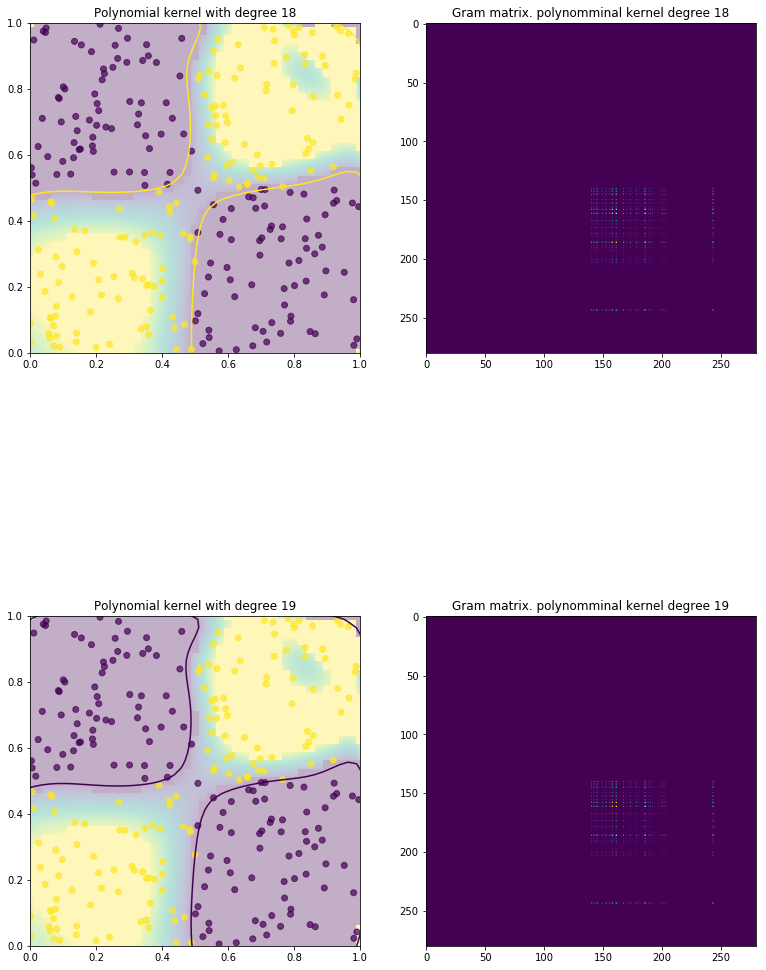

In [275]:
show_checkboard_polynomial_kernel_class(d_min=18,d_max=20)

Now with more complex checkbard data.

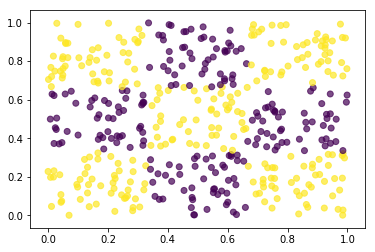

In [276]:
X,y=checkboard_data_generator(3,3,50)

plt.scatter(X[:, 0], X[:, 1],c=y,  alpha=0.7)

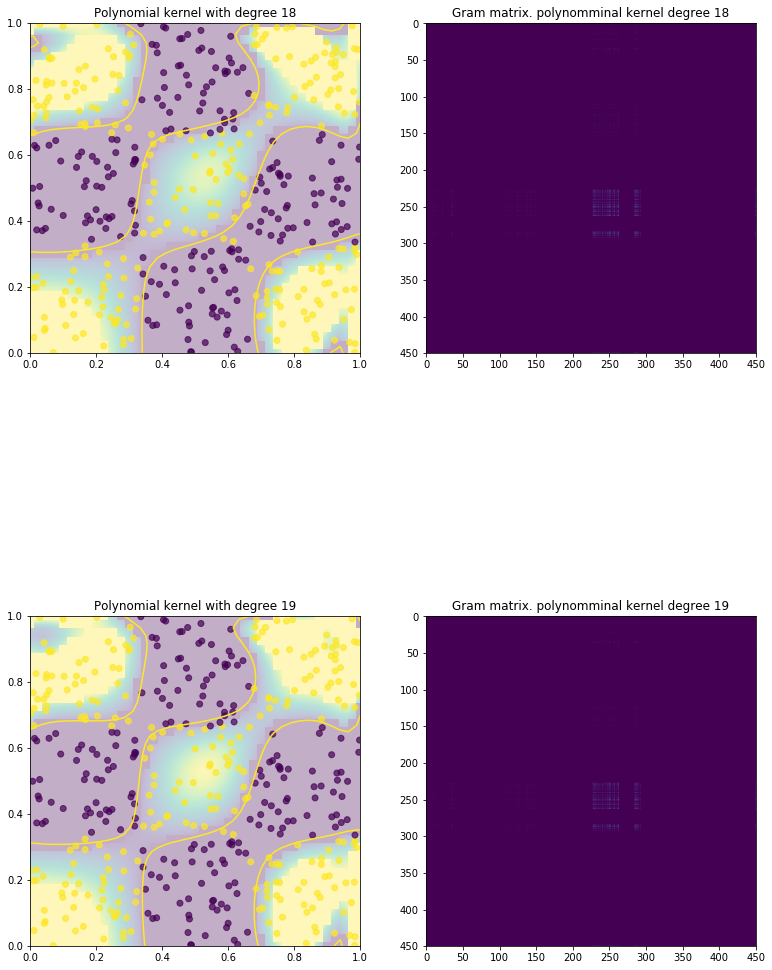

In [277]:
show_checkboard_polynomial_kernel_class(d_min=18,d_max=20)

Let us check how does Gaussian.

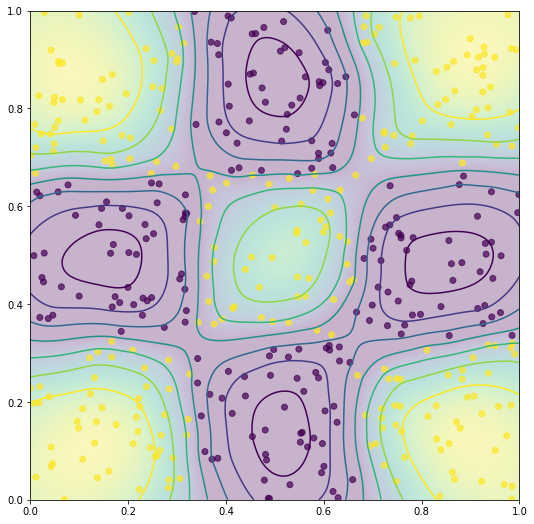

In [278]:
from scipy.spatial import distance

def gaussian_kernel(xa,xb,gamma):
    d = distance.cdist(xa,xb,metric='euclidean')
    return np.exp(-d*gamma)

gamma = 1.
K = gaussian_kernel(X,X,gamma)
lamb = 1.
alpha = np.dot(np.linalg.inv(K+lamb*np.eye(K.shape[0])),y)
xx,yy = np.meshgrid(np.linspace(0,1,200),np.linspace(0,1,200))
viz=np.c_[xx.ravel(),yy.ravel()]


z = np.dot(gaussian_kernel(viz,X,1.),alpha)

plt.scatter(X[:, 0], X[:, 1], c=y,  alpha=0.7)
plt.gca().set_xlim([0.,1.])
plt.gca().set_ylim([0.,1.])
plt.imshow(z.reshape((200,200)), interpolation='bilinear', origin='lower', extent=(0,1,0,1),alpha=0.3, vmin=0, vmax=1)
plt.contour(xx,yy,z.reshape((200,200)))

plt.gcf().set_size_inches((9,9))

It works pretty good.

### One last test

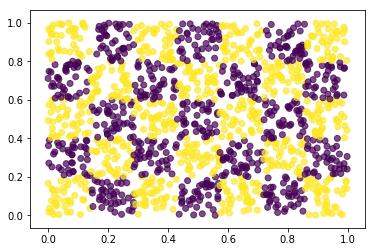

In [279]:
X,y=checkboard_data_generator(7,5,40)

plt.scatter(X[:, 0], X[:, 1],c=y,  alpha=0.7)

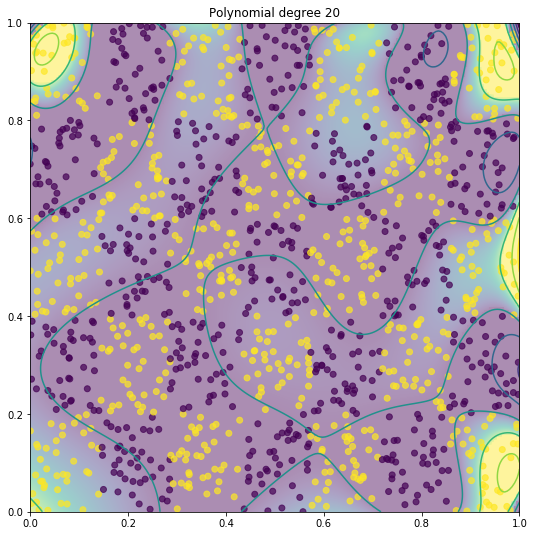

In [280]:
from scipy.spatial import distance

d = 20
K = polynomial_kernel(X,X,d)
lamb = 1.
alpha = np.dot(np.linalg.inv(K+lamb*np.eye(K.shape[0])),y)
xx,yy = np.meshgrid(np.linspace(0,1,200),np.linspace(0,1,200))
viz=np.c_[xx.ravel(),yy.ravel()]


z = np.dot(polynomial_kernel(viz,X,d),alpha)

plt.scatter(X[:, 0], X[:, 1], c=y,  alpha=0.7)
plt.gca().set_xlim([0.,1.])
plt.gca().set_ylim([0.,1.])
plt.imshow(z.reshape((200,200)), interpolation='bilinear', origin='lower', extent=(0,1,0,1),alpha=0.45, vmin=0, vmax=1)
plt.contour(xx,yy,z.reshape((200,200)))
plt.title('Polynomial degree '+str(d))
plt.gcf().set_size_inches((9,9))

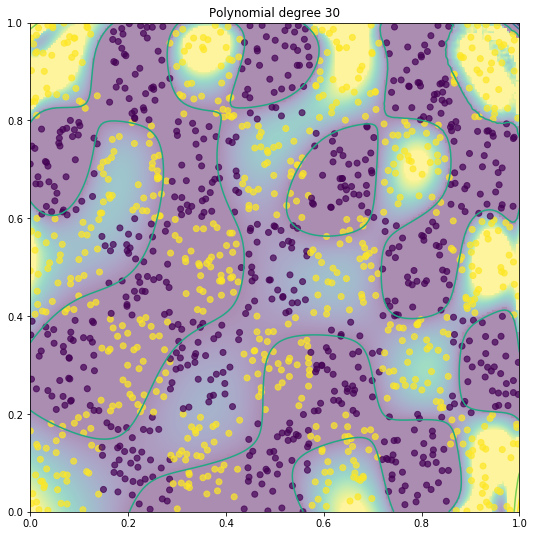

In [281]:
from scipy.spatial import distance

d = 30
K = polynomial_kernel(X,X,d)
lamb = 1.
alpha = np.dot(np.linalg.inv(K+lamb*np.eye(K.shape[0])),y)
xx,yy = np.meshgrid(np.linspace(0,1,200),np.linspace(0,1,200))
viz=np.c_[xx.ravel(),yy.ravel()]


z = np.dot(polynomial_kernel(viz,X,d),alpha)

plt.scatter(X[:, 0], X[:, 1], c=y,  alpha=0.7)
plt.gca().set_xlim([0.,1.])
plt.gca().set_ylim([0.,1.])
plt.imshow(z.reshape((200,200)), interpolation='bilinear', origin='lower', extent=(0,1,0,1),alpha=0.45, vmin=0, vmax=1)
plt.contour(xx,yy,z.reshape((200,200)))
plt.title('Polynomial degree '+str(d))
plt.gcf().set_size_inches((9,9))

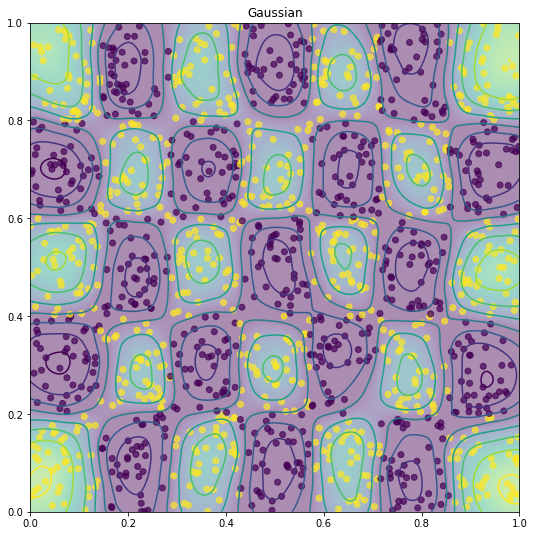

In [252]:
from scipy.spatial import distance

gamma = 1.
K = gaussian_kernel(X,X,gamma)
lamb = 1.
alpha = np.dot(np.linalg.inv(K+lamb*np.eye(K.shape[0])),y)
xx,yy = np.meshgrid(np.linspace(0,1,200),np.linspace(0,1,200))
viz=np.c_[xx.ravel(),yy.ravel()]


z = np.dot(gaussian_kernel(viz,X,1.),alpha)

plt.scatter(X[:, 0], X[:, 1], c=y,  alpha=0.7)
plt.gca().set_xlim([0.,1.])
plt.gca().set_ylim([0.,1.])
plt.imshow(z.reshape((200,200)), interpolation='bilinear', origin='lower', extent=(0,1,0,1),alpha=0.45, vmin=0, vmax=1)
plt.contour(xx,yy,z.reshape((200,200)))
plt.title('Gaussian')
plt.gcf().set_size_inches((9,9))

Observe that polynomial failed but Gaussian did not!

Observe also that the choice of the degree may be significant. Sometimes we may require a high degree like in this example to be able to classify properly but in other cases like in moons data a high degree may lead to overfloating. The correct choice of the degree may be uncertain.